In [1]:
from keras.datasets import mnist
from keras.datasets import fashion_mnist

from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

import random
import matplotlib
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
# 导入之前的实验数据
xls_path = 'E:\\Phd\\Research\\Experiments\\0416\\data.xlsx'
x1 = pd.read_excel(xls_path, sheet_name='x1', header=None).to_numpy()

df_res = pd.read_excel(xls_path, sheet_name='res')
res_0 = df_res['res_0'].to_numpy().reshape(-1, 1)

df_label = pd.read_excel(xls_path, sheet_name='label')
label_x1 = df_label['label_x1'].to_numpy()

In [3]:
ind_x1_0 = np.argwhere(label_x1 == 0).flatten().tolist()
ind_x1_1 = np.argwhere(label_x1 == 1).flatten().tolist()
ind_x1_2 = np.argwhere(label_x1 == 2).flatten().tolist()
ind_x1_3 = np.argwhere(label_x1 == 3).flatten().tolist()
ind_x1_4 = np.argwhere(label_x1 == 4).flatten().tolist()
ind_x1_5 = np.argwhere(label_x1 == 5).flatten().tolist()
ind_x1_6 = np.argwhere(label_x1 == 6).flatten().tolist()
ind_x1_7 = np.argwhere(label_x1 == 7).flatten().tolist()
ind_x1_8 = np.argwhere(label_x1 == 8).flatten().tolist()
ind_x1_9 = np.argwhere(label_x1 == 9).flatten().tolist()

In [4]:
# 加载Fashion-MNIST数据集
(x2_train, y2_train), (x2_test, y2_test) = fashion_mnist.load_data()
x2_all = x2_train.reshape(60000, 784)

In [5]:
ind_x2_0 = np.argwhere(y2_train == 0).flatten().tolist()
ind_x2_1 = np.argwhere(y2_train == 1).flatten().tolist()
ind_x2_2 = np.argwhere(y2_train == 2).flatten().tolist()
ind_x2_3 = np.argwhere(y2_train == 3).flatten().tolist()
ind_x2_4 = np.argwhere(y2_train == 4).flatten().tolist()
ind_x2_5 = np.argwhere(y2_train == 5).flatten().tolist()
ind_x2_6 = np.argwhere(y2_train == 6).flatten().tolist()
ind_x2_7 = np.argwhere(y2_train == 7).flatten().tolist()
ind_x2_8 = np.argwhere(y2_train == 8).flatten().tolist()
ind_x2_9 = np.argwhere(y2_train == 9).flatten().tolist()

### 实验1-3：MNIST->Fashion-MNIST N=5000 整类替换
### 实验1-3-1：Fashion Class 3 (连衣裙) -> MNIST Class 1

In [6]:
"""获得x1降维后的一维分布"""
# 使用网格搜索交叉验证来优化带宽
params_0 = {'bandwidth': np.logspace(-1, 3, 40)}
grid_0 = GridSearchCV(KernelDensity(), params_0)
grid_0.fit(res_0)
print("best bandwidth 1d: {0}".format(grid_0.best_estimator_.bandwidth))

# 使用最佳估计器来计算核密度估计
kde_0 = grid_0.best_estimator_

best bandwidth 1d: 46.41588833612777


In [7]:
# Fashion Class 3 (连衣裙) -> MNIST Class 1
x1_m1_f3 = x1
x1_m1_f3[ind_x1_1] = x2_all[ind_x2_3[:len(ind_x1_1)]]

In [8]:
"""Fashion Class 3 (连衣裙) -> MNIST Class 1降维后的一维分布"""
pca_m1_f3 = PCA(n_components=1, whiten=False)
res_m1_f3 = pca_m1_f3.fit_transform(x1_m1_f3)

# 使用网格搜索交叉验证来优化带宽
params_m1_f3 = {'bandwidth': np.logspace(-1, 3, 40)}
grid_m1_f3 = GridSearchCV(KernelDensity(), params_m1_f3)
grid_m1_f3.fit(res_m1_f3)
print("best bandwidth 1d: {0}".format(grid_m1_f3.best_estimator_.bandwidth))

# 使用最佳估计器来计算核密度估计
kde_m1_f3 = grid_m1_f3.best_estimator_

best bandwidth 1d: 74.43803013251689


* KDE数学公式
$$\hat{f}_K(x)=\frac{1}{nh}\sum_{i=1}^{n}K\Big(\frac{X_i-x}{h}\Big)$$
其中$n=5000, h_1=46.41588833612777, h_2=74.43803013251689, \{X_i\} \in R, K(u)=\frac{1}{\sqrt{2\pi}}\exp(-u^2/2)$ 

#### a) 不同一维分布的可视化对比

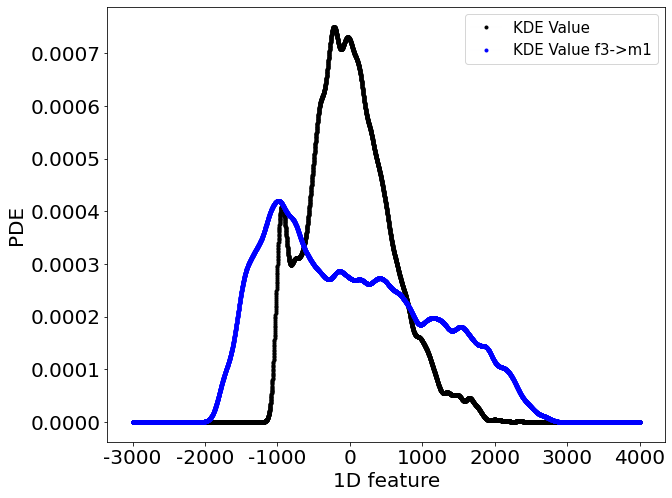

In [9]:
xplot = np.linspace(-3000, 4000, 7000).reshape(-1,1)
dens_0 = kde_0.score_samples(xplot)  # 返回的是点对应概率密度的log值，需要使用exp求指数还原
dens_m1_f3 = kde_m1_f3.score_samples(xplot)

plt.figure(figsize = (10, 8))  # 设置画布大小
plt.plot(xplot, np.exp(dens_0), marker='.', linewidth=0.01, c="k", label='KDE Value')
plt.plot(xplot, np.exp(dens_m1_f3), marker='.', linewidth=0.01, c="b", label='KDE Value f3->m1')
plt.tick_params(labelsize = 20)  # 设置坐标刻度值的大小
font = {'size': 20}  # 设置横纵坐标的名称以及对应字体格式、大小
plt.xlabel('1D feature', font)
plt.ylabel('PDE', font)
plt.legend(fontsize = 15)  # 显示图例,设置图例字体大小
plt.show()

#### b) 1D特征区间KL散度值变化

In [10]:
# [-2000, -1500)区间
xplot_int9 = np.linspace(-2000, -1500, 500).reshape(-1,1)
dens_0_int9 = kde_0.score_samples(xplot_int9)
dens_m1_f3_int9 = kde_m1_f3.score_samples(xplot_int9)

# [-1500, -1000)区间
xplot_int2 = np.linspace(-1500, -1000, 500).reshape(-1,1)
dens_0_int2 = kde_0.score_samples(xplot_int2)
dens_m1_f3_int2 = kde_m1_f3.score_samples(xplot_int2)

# [-1000, -500)区间
xplot_int = np.linspace(-1000, -500, 500).reshape(-1,1)
dens_0_int = kde_0.score_samples(xplot_int)
dens_m1_f3_int = kde_m1_f3.score_samples(xplot_int)

# [-500, 0)区间
xplot_int3 = np.linspace(-500, 0, 500).reshape(-1,1)
dens_0_int3 = kde_0.score_samples(xplot_int3)
dens_m1_f3_int3 = kde_m1_f3.score_samples(xplot_int3)

# [0, 500)区间
xplot_int1 = np.linspace(0, 500, 500).reshape(-1,1)
dens_0_int1 = kde_0.score_samples(xplot_int1)
dens_m1_f3_int1 = kde_m1_f3.score_samples(xplot_int1)

# [500, 1000)区间
xplot_int4 = np.linspace(500, 1000, 500).reshape(-1,1)
dens_0_int4 = kde_0.score_samples(xplot_int4)
dens_m1_f3_int4 = kde_m1_f3.score_samples(xplot_int4)

# [1000, 1500)区间
xplot_int5 = np.linspace(1000, 1500, 500).reshape(-1,1)
dens_0_int5 = kde_0.score_samples(xplot_int5)
dens_m1_f3_int5 = kde_m1_f3.score_samples(xplot_int5)

# [1500, 2000)区间
xplot_int6 = np.linspace(1500, 2000, 500).reshape(-1,1)
dens_0_int6 = kde_0.score_samples(xplot_int6)
dens_m1_f3_int6 = kde_m1_f3.score_samples(xplot_int6)

# [2000, 2500)区间
xplot_int7 = np.linspace(2000, 2500, 500).reshape(-1,1)
dens_0_int7 = kde_0.score_samples(xplot_int7)
dens_m1_f3_int7 = kde_m1_f3.score_samples(xplot_int7)

# [2500, 3000)区间
xplot_int8 = np.linspace(2500, 3000, 500).reshape(-1,1)
dens_0_int8 = kde_0.score_samples(xplot_int8)
dens_m1_f3_int8 = kde_m1_f3.score_samples(xplot_int8)

In [11]:
KL_int  = scipy.stats.entropy(np.exp(dens_0_int), np.exp(dens_m1_f3_int))
KL_int1 = scipy.stats.entropy(np.exp(dens_0_int1), np.exp(dens_m1_f3_int1))
KL_int2 = scipy.stats.entropy(np.exp(dens_0_int2), np.exp(dens_m1_f3_int2))
KL_int3 = scipy.stats.entropy(np.exp(dens_0_int3), np.exp(dens_m1_f3_int3))
KL_int4 = scipy.stats.entropy(np.exp(dens_0_int4), np.exp(dens_m1_f3_int4))
KL_int5 = scipy.stats.entropy(np.exp(dens_0_int5), np.exp(dens_m1_f3_int5))
KL_int6 = scipy.stats.entropy(np.exp(dens_0_int6), np.exp(dens_m1_f3_int6))
KL_int7 = scipy.stats.entropy(np.exp(dens_0_int7), np.exp(dens_m1_f3_int7))
KL_int8 = scipy.stats.entropy(np.exp(dens_0_int8), np.exp(dens_m1_f3_int8))
KL_int9 = scipy.stats.entropy(np.exp(dens_0_int9), np.exp(dens_m1_f3_int9))

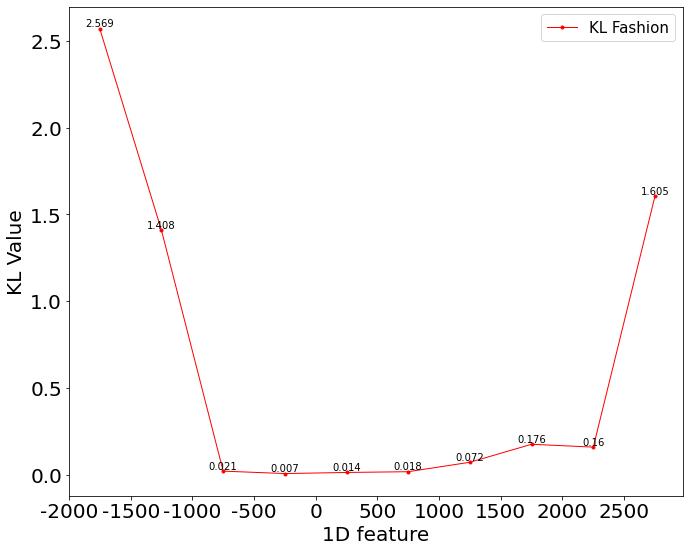

In [12]:
"""可视化KL散度折线图"""
xplot_KL = [-1750, -1250, -750, -250, 250, 750, 1250, 1750, 2250, 2750]
KL_f = [KL_int9, KL_int2, KL_int, KL_int3, KL_int1, KL_int4, KL_int5, KL_int6, KL_int7, KL_int8]

plt.figure(figsize = (11, 9))  # 设置画布大小
plt.plot(xplot_KL, KL_f, marker='.', linewidth=1, c="r", label='KL Fashion')

for c, d in zip(xplot_KL, KL_f):
    plt.text(c, d, (float('%.3f'%d)), ha='center', va='bottom', fontsize=10)

plt.xticks(np.arange(-2000, 3000, step=500))
plt.tick_params(labelsize = 20)  # 设置坐标刻度值的大小
font = {'size': 20}  # 设置横纵坐标的名称以及对应字体格式、大小
plt.xlabel('1D feature', font)
plt.ylabel('KL Value', font)
plt.legend(fontsize = 15)  # 显示图例,设置图例字体大小
plt.show()

#### c) 不同区间样本数直方图

In [13]:
ind_0_int9 = [i for i,x in enumerate(res_0) if (-2000 <= x < -1500)]
ind_0_int2 = [i for i,x in enumerate(res_0) if (-1500 <= x < -1000)]
ind_0_int = [i for i,x in enumerate(res_0) if (-1000 <= x < -500)]
ind_0_int3 = [i for i,x in enumerate(res_0) if (-500 <= x < 0)]
ind_0_int1 = [i for i,x in enumerate(res_0) if (0 <= x < 500)]
ind_0_int4 = [i for i,x in enumerate(res_0) if (500 <= x < 1000)]
ind_0_int5 = [i for i,x in enumerate(res_0) if (1000 <= x < 1500)]
ind_0_int6 = [i for i,x in enumerate(res_0) if (1500 <= x < 2000)]
ind_0_int7 = [i for i,x in enumerate(res_0) if (2000 <= x < 2500)]
ind_0_int8 = [i for i,x in enumerate(res_0) if (2500 <= x < 3000)]

In [14]:
ind_m1f3_int9 = [i for i,x in enumerate(res_m1_f3) if (-2000 <= x < -1500)]
ind_m1f3_int2 = [i for i,x in enumerate(res_m1_f3) if (-1500 <= x < -1000)]
ind_m1f3_int = [i for i,x in enumerate(res_m1_f3) if (-1000 <= x < -500)]
ind_m1f3_int3 = [i for i,x in enumerate(res_m1_f3) if (-500 <= x < 0)]
ind_m1f3_int1 = [i for i,x in enumerate(res_m1_f3) if (0 <= x < 500)]
ind_m1f3_int4 = [i for i,x in enumerate(res_m1_f3) if (500 <= x < 1000)]
ind_m1f3_int5 = [i for i,x in enumerate(res_m1_f3) if (1000 <= x < 1500)]
ind_m1f3_int6 = [i for i,x in enumerate(res_m1_f3) if (1500 <= x < 2000)]
ind_m1f3_int7 = [i for i,x in enumerate(res_m1_f3) if (2000 <= x < 2500)]
ind_m1f3_int8 = [i for i,x in enumerate(res_m1_f3) if (2500 <= x < 3000)]

In [15]:
ind_f3_int9 = [i for i,x in enumerate(res_m1_f3[ind_x1_1]) if (-2000 <= x < -1500)]
ind_f3_int2 = [i for i,x in enumerate(res_m1_f3[ind_x1_1]) if (-1500 <= x < -1000)]
ind_f3_int = [i for i,x in enumerate(res_m1_f3[ind_x1_1]) if (-1000 <= x < -500)]
ind_f3_int3 = [i for i,x in enumerate(res_m1_f3[ind_x1_1]) if (-500 <= x < 0)]
ind_f3_int1 = [i for i,x in enumerate(res_m1_f3[ind_x1_1]) if (0 <= x < 500)]
ind_f3_int4 = [i for i,x in enumerate(res_m1_f3[ind_x1_1]) if (500 <= x < 1000)]
ind_f3_int5 = [i for i,x in enumerate(res_m1_f3[ind_x1_1]) if (1000 <= x < 1500)]
ind_f3_int6 = [i for i,x in enumerate(res_m1_f3[ind_x1_1]) if (1500 <= x < 2000)]
ind_f3_int7 = [i for i,x in enumerate(res_m1_f3[ind_x1_1]) if (2000 <= x < 2500)]
ind_f3_int8 = [i for i,x in enumerate(res_m1_f3[ind_x1_1]) if (2500 <= x < 3000)]

In [16]:
ind_0_m1f3_int9 = [x for x in ind_0_int9 if x in ind_m1f3_int9]
ind_0_m1f3_int2 = [x for x in ind_0_int2 if x in ind_m1f3_int2]
ind_0_m1f3_int = [x for x in ind_0_int if x in ind_m1f3_int]
ind_0_m1f3_int3 = [x for x in ind_0_int3 if x in ind_m1f3_int3]
ind_0_m1f3_int1 = [x for x in ind_0_int1 if x in ind_m1f3_int1]
ind_0_m1f3_int4 = [x for x in ind_0_int4 if x in ind_m1f3_int4]
ind_0_m1f3_int5 = [x for x in ind_0_int5 if x in ind_m1f3_int5]
ind_0_m1f3_int6 = [x for x in ind_0_int6 if x in ind_m1f3_int6]
ind_0_m1f3_int7 = [x for x in ind_0_int7 if x in ind_m1f3_int7]
ind_0_m1f3_int8 = [x for x in ind_0_int8 if x in ind_m1f3_int8]

In [17]:
# 替换前手写样本数目
num_orig = [len(ind_0_int9), len(ind_0_int2), len(ind_0_int), len(ind_0_int3), len(ind_0_int1), len(ind_0_int4), len(ind_0_int5), len(ind_0_int6), len(ind_0_int7), len(ind_0_int8)]
# m1->f3替换后样本数目
num_m1f3 = [len(ind_m1f3_int9), len(ind_m1f3_int2), len(ind_m1f3_int), len(ind_m1f3_int3), len(ind_m1f3_int1), len(ind_m1f3_int4), len(ind_m1f3_int5), len(ind_m1f3_int6), len(ind_m1f3_int7), len(ind_m1f3_int8)]
# m1->f3替换后手写样本数目
num_m_m1f3 = [len(ind_m1f3_int9)-len(ind_f3_int9), len(ind_m1f3_int2)-len(ind_f3_int2), len(ind_m1f3_int)-len(ind_f3_int), len(ind_m1f3_int3)-len(ind_f3_int3), len(ind_m1f3_int1)-len(ind_f3_int1), len(ind_m1f3_int4)-len(ind_f3_int4), len(ind_m1f3_int5)-len(ind_f3_int5), len(ind_m1f3_int6)-len(ind_f3_int6), len(ind_m1f3_int7)-len(ind_f3_int7), len(ind_m1f3_int8)-len(ind_f3_int8)]
# m1->f3替换前后在同一区间的手写样本数目
num_0_m1f3 = [len(ind_0_m1f3_int9), len(ind_0_m1f3_int2), len(ind_0_m1f3_int), len(ind_0_m1f3_int3), len(ind_0_m1f3_int1), len(ind_0_m1f3_int4), len(ind_0_m1f3_int5), len(ind_0_m1f3_int6), len(ind_0_m1f3_int7), len(ind_0_m1f3_int8)]

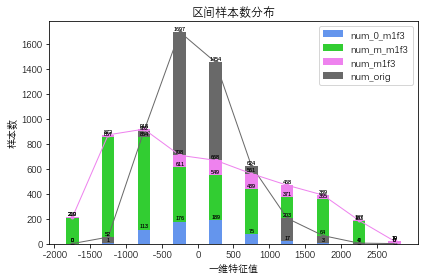

In [18]:
labels = ['-2000', '-1500', '-1000', '-500', '0', '500', '1000', '1500', '2000', '2500']
legends = ['num_orig', 'num_m1f3', 'num_m_m1f3', 'num_0_m1f3']
num_hists = len(labels)
x = np.arange(num_hists) # the label locations
color = ['dimgray', 'violet', 'limegreen', 'cornflowerblue']
width = 0.35

fig4, ax4 = plt.subplots()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax4.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # 1 point vertical offset
                    textcoords='offset points',
                    fontsize='xx-small',
                    ha='center', va='bottom')

def rects_int(i):
    tosort = np.array([num_orig[i], num_m1f3[i], num_m_m1f3[i], num_0_m1f3[i]])
    ind_tosort = np.argsort(tosort)
    rects_i3 = ax4.bar(x[i]+0.5, tosort[ind_tosort][3], width, color=color[ind_tosort[3]])
    rects_i2 = ax4.bar(x[i]+0.5, tosort[ind_tosort][2], width, color=color[ind_tosort[2]])
    rects_i1 = ax4.bar(x[i]+0.5, tosort[ind_tosort][1], width, color=color[ind_tosort[1]])
    rects_i0 = ax4.bar(x[i]+0.5, tosort[ind_tosort][0], width, color=color[ind_tosort[0]])
    autolabel(rects_i0)
    autolabel(rects_i1)
    autolabel(rects_i2)
    autolabel(rects_i3)
    return [rects_i0, rects_i1, rects_i2, rects_i3], ind_tosort

rects = []
ranks = []
for i in x:
    rects.append(rects_int(i)[0])
    ranks.append(rects_int(i)[1])

ax4.set_ylabel('样本数')
ax4.set_xlabel('一维特征值')
ax4.set_title('区间样本数分布')
ax4.set_xticks(x)
ax4.set_xticklabels(labels)
ax4.legend(rects[3], np.array(legends)[ranks[3]], loc='upper right')

plt.plot(x+0.5, num_orig, marker='.', linewidth=1, c="dimgrey", label='orig')
plt.plot(x+0.5, num_m1f3, marker='.', linewidth=1, c="violet", label='m1f3')

fig4.tight_layout()

* 蓝色刻度线：替换前后在同一特征区间的样本数量
* 绿色刻度线：替换后区间内手写数字样本数量
* 粉色刻度线：替换后区间样本数量（手写数字+服装）
* 灰色刻度线：替换前区间手写样本数量

np.argsort(prop_0_m1f3): array([0, 8, 1, 7, 6, 2, 9, 5, 3, 4], dtype=int64)

In [19]:
# legends = ['num_orig', 'num_m1f3', 'num_m_m1f3', 'num_0_m1f3']
# color = ['dimgray', 'violet', 'limegreen', 'cornflowerblue']
ranks

[array([0, 3, 2, 1], dtype=int64),
 array([3, 0, 2, 1], dtype=int64),
 array([3, 2, 0, 1], dtype=int64),
 array([3, 2, 1, 0], dtype=int64),
 array([3, 2, 1, 0], dtype=int64),
 array([3, 2, 1, 0], dtype=int64),
 array([3, 0, 2, 1], dtype=int64),
 array([3, 0, 2, 1], dtype=int64),
 array([3, 0, 2, 1], dtype=int64),
 array([0, 3, 1, 2], dtype=int64)]

#### d) 样本相似度 vs KL散度

In [20]:
prop_0_m1f3_int9 = num_0_m1f3[0] * 2 / (num_orig[0] + num_m1f3[0]) 
prop_0_m1f3_int2 = num_0_m1f3[1] * 2 / (num_orig[1] + num_m1f3[1]) 
prop_0_m1f3_int = num_0_m1f3[2] * 2 / (num_orig[2] + num_m1f3[2]) 
prop_0_m1f3_int3 = num_0_m1f3[3] * 2 / (num_orig[3] + num_m1f3[3]) 
prop_0_m1f3_int1 = num_0_m1f3[4] * 2 / (num_orig[4] + num_m1f3[4]) 
prop_0_m1f3_int4 = num_0_m1f3[5] * 2 / (num_orig[5] + num_m1f3[5]) 
prop_0_m1f3_int5 = num_0_m1f3[6] * 2 / (num_orig[6] + num_m1f3[6]) 
prop_0_m1f3_int6 = num_0_m1f3[7] * 2 / (num_orig[7] + num_m1f3[7]) 
prop_0_m1f3_int7 = num_0_m1f3[8] * 2 / (num_orig[8] + num_m1f3[8]) 
prop_0_m1f3_int8 = num_0_m1f3[9] * 2 / (num_orig[9] + num_m1f3[9]) 

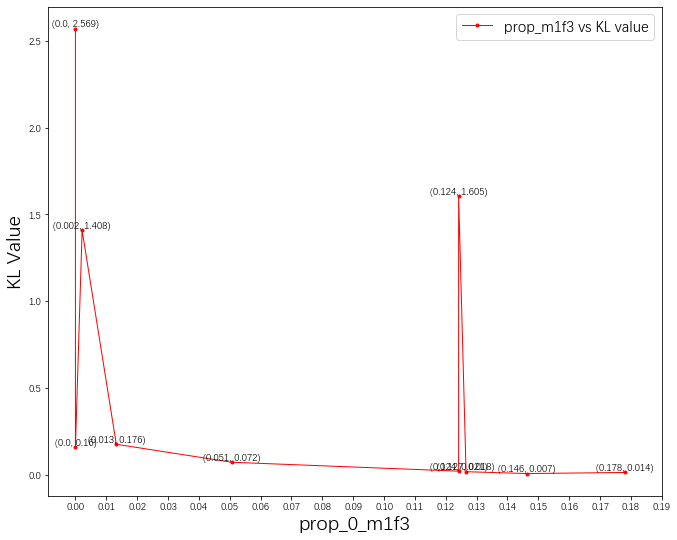

In [21]:
prop_0_m1f3 = [prop_0_m1f3_int9, prop_0_m1f3_int2, prop_0_m1f3_int, prop_0_m1f3_int3, prop_0_m1f3_int1, prop_0_m1f3_int4, prop_0_m1f3_int5, prop_0_m1f3_int6, prop_0_m1f3_int7, prop_0_m1f3_int]

xplot_prop = np.array(prop_0_m1f3)[np.argsort(prop_0_m1f3)]
yplot_kl = np.array(KL_f)[np.argsort(prop_0_m1f3)]

plt.figure(figsize = (11, 9))  # 设置画布大小
plt.plot(xplot_prop, yplot_kl, marker='.', linewidth=1, c="r", label='prop_m1f3 vs KL value')

for e, f in zip(xplot_prop, yplot_kl):
    plt.text(e, f, (float('%.3f'%e), float('%.3f'%f)), ha='center', va='bottom', fontsize=10)

plt.xticks(np.arange(0, 0.2, step=0.01))
plt.tick_params(labelsize = 10)  # 设置坐标刻度值的大小
font = {'size': 20}  # 设置横纵坐标的名称以及对应字体格式、大小
plt.xlabel('prop_0_m1f3', font)
plt.ylabel('KL Value', font)
plt.legend(fontsize = 15)  # 显示图例,设置图例字体大小
plt.show()

In [22]:
np.argsort(prop_0_m1f3)

array([0, 8, 1, 7, 6, 2, 9, 5, 3, 4], dtype=int64)

#### e) 三图合一

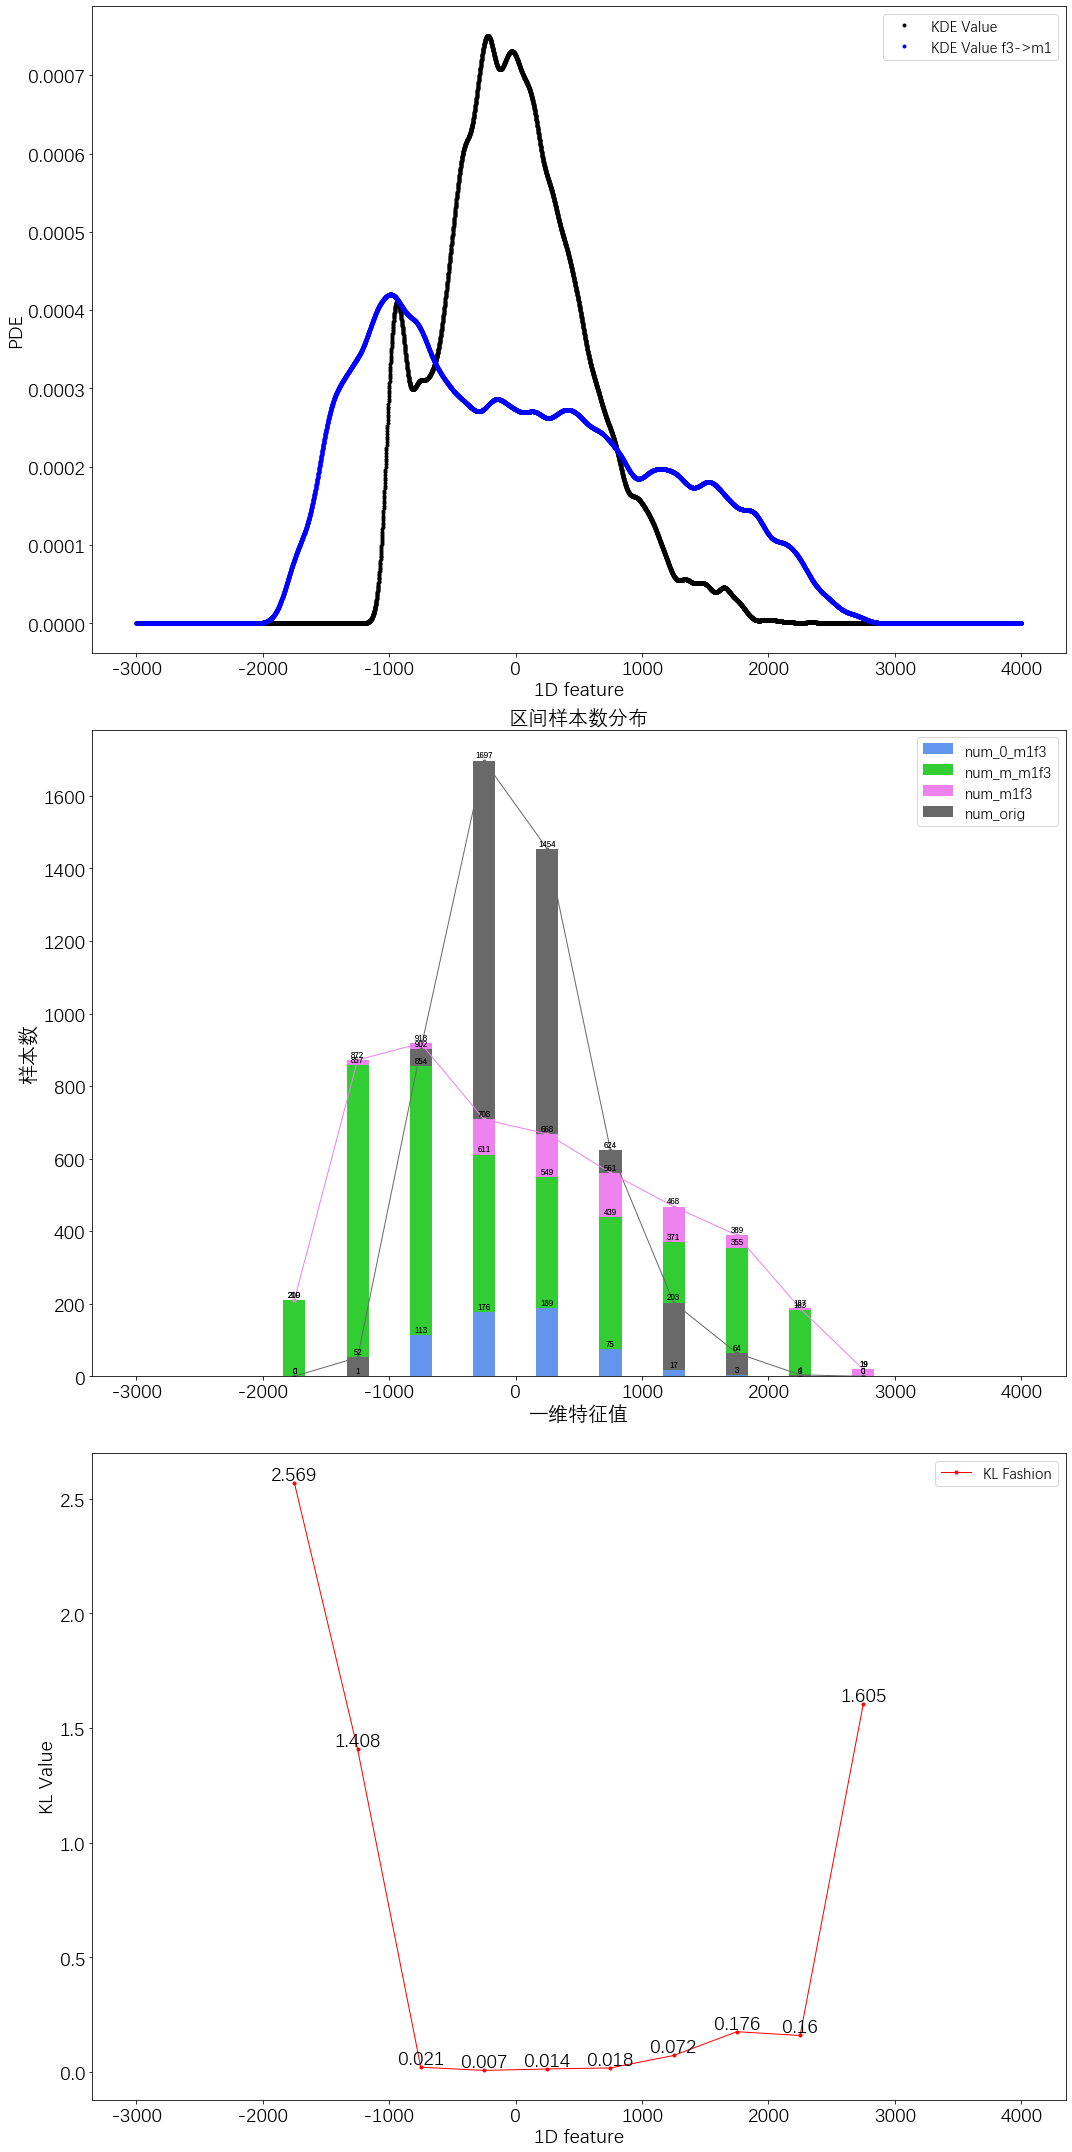

In [23]:
fig = plt.figure(figsize=(15, 30))

'''PDE图'''
ax1 = plt.subplot(311)
plt.plot(xplot, np.exp(dens_0), marker='.', linewidth=0.01, c="k", label='KDE Value')
plt.plot(xplot, np.exp(dens_m1_f3), marker='.', linewidth=0.01, c="b", label='KDE Value f3->m1')
plt.tick_params(labelsize = 20)  # 设置坐标刻度值的大小
font = {'size': 20}  # 设置横纵坐标的名称以及对应字体格式、大小
plt.xlabel('1D feature', font)
plt.ylabel('PDE', font)
plt.legend(fontsize = 15)  # 显示图例,设置图例字体大小

'''直方图'''
ax2 = plt.subplot(312, sharex=ax1)
labels = ['-2000', '-1500', '-1000', '-500', '0', '500', '1000', '1500', '2000', '2500']
legends = ['num_orig', 'num_m1f3', 'num_m_m1f3', 'num_0_m1f3']
num_hists = len(labels)
x = np.arange(num_hists) # the label locations
color = ['dimgray', 'violet', 'limegreen', 'cornflowerblue']
width = 175

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax2.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # 1 point vertical offset
                    textcoords='offset points',
                    fontsize='small',
                    ha='center', va='bottom')

def rects_int(i):
    tosort = np.array([num_orig[i], num_m1f3[i], num_m_m1f3[i], num_0_m1f3[i]])
    ind_tosort = np.argsort(tosort)
    rects_i3 = ax2.bar(-1750+x[i]*500, tosort[ind_tosort][3], width, color=color[ind_tosort[3]])
    rects_i2 = ax2.bar(-1750+x[i]*500, tosort[ind_tosort][2], width, color=color[ind_tosort[2]])
    rects_i1 = ax2.bar(-1750+x[i]*500, tosort[ind_tosort][1], width, color=color[ind_tosort[1]])
    rects_i0 = ax2.bar(-1750+x[i]*500, tosort[ind_tosort][0], width, color=color[ind_tosort[0]])
    autolabel(rects_i0)
    autolabel(rects_i1)
    autolabel(rects_i2)
    autolabel(rects_i3)
    return [rects_i0, rects_i1, rects_i2, rects_i3], ind_tosort

rects = []
ranks = []
for i in x:
    rects.append(rects_int(i)[0])
    ranks.append(rects_int(i)[1])

ax2.set_ylabel('样本数', font)
ax2.set_xlabel('一维特征值', font)
ax2.set_title('区间样本数分布', font)
ax2.legend(rects[3], np.array(legends)[ranks[3]], loc='upper right', fontsize = 15)
plt.tick_params(labelsize = 20)  # 设置坐标刻度值的大小
plt.plot(-1750+x*500, num_orig, marker='.', linewidth=1, c="dimgrey", label='orig')
plt.plot(-1750+x*500, num_m1f3, marker='.', linewidth=1, c="violet", label='m1f3')

'''KL散度折线图'''
ax3 = plt.subplot(313, sharex=ax1)
plt.plot(xplot_KL, KL_f, marker='.', linewidth=1, c="r", label='KL Fashion')

for c, d in zip(xplot_KL, KL_f):
    plt.text(c, d, (float('%.3f'%d)), ha='center', va='bottom', fontsize=20)

plt.tick_params(labelsize = 20)  # 设置坐标刻度值的大小
plt.xlabel('1D feature', font)
plt.ylabel('KL Value', font)
plt.legend(fontsize = 15)  # 显示图例,设置图例字体大小

fig.tight_layout()